In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

path = r'C:\Users\xuanx\Desktop\Data Science Project 2\PRSA2017_Data_20130301-20170228\PRSA_Data_20130301-20170228'
all_files = glob.glob(path + '/*.csv')
print(all_files)

maindf = []

for filename in all_files:
    df = pd.read_csv(filename, index_col= 0, header = 0),
    maindf.append(df)
    
print(maindf)

['C:\\Users\\xuanx\\Desktop\\Data Science Project 2\\PRSA2017_Data_20130301-20170228\\PRSA_Data_20130301-20170228\\PRSA_Data_Aotizhongxin_20130301-20170228.csv', 'C:\\Users\\xuanx\\Desktop\\Data Science Project 2\\PRSA2017_Data_20130301-20170228\\PRSA_Data_20130301-20170228\\PRSA_Data_Changping_20130301-20170228.csv', 'C:\\Users\\xuanx\\Desktop\\Data Science Project 2\\PRSA2017_Data_20130301-20170228\\PRSA_Data_20130301-20170228\\PRSA_Data_Dingling_20130301-20170228.csv', 'C:\\Users\\xuanx\\Desktop\\Data Science Project 2\\PRSA2017_Data_20130301-20170228\\PRSA_Data_20130301-20170228\\PRSA_Data_Dongsi_20130301-20170228.csv', 'C:\\Users\\xuanx\\Desktop\\Data Science Project 2\\PRSA2017_Data_20130301-20170228\\PRSA_Data_20130301-20170228\\PRSA_Data_Guanyuan_20130301-20170228.csv', 'C:\\Users\\xuanx\\Desktop\\Data Science Project 2\\PRSA2017_Data_20130301-20170228\\PRSA_Data_20130301-20170228\\PRSA_Data_Gucheng_20130301-20170228.csv', 'C:\\Users\\xuanx\\Desktop\\Data Science Project 2\\PRS

In [2]:
print(len(maindf))
datalist = range(0,12)

fully=[]

for n in datalist:
    full = pd.DataFrame(maindf[n][0])
    fully.append(full)

alldata = pd.concat(fully, ignore_index= True)


12


In [3]:
alldata.isnull().any()

year       False
month      False
day        False
hour       False
PM2.5       True
PM10        True
SO2         True
NO2         True
CO          True
O3          True
TEMP        True
PRES        True
DEWP        True
RAIN        True
wd          True
WSPM        True
station    False
dtype: bool

In [5]:
#rename PM2.5 to replace the '.' so not to interfere with coding
alldata.rename(columns={'PM2.5':'PM2dot5'}, inplace=True)
alldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 17 columns):
year       420768 non-null int64
month      420768 non-null int64
day        420768 non-null int64
hour       420768 non-null int64
PM2dot5    412029 non-null float64
PM10       414319 non-null float64
SO2        411747 non-null float64
NO2        408652 non-null float64
CO         400067 non-null float64
O3         407491 non-null float64
TEMP       420370 non-null float64
PRES       420375 non-null float64
DEWP       420365 non-null float64
RAIN       420378 non-null float64
wd         418946 non-null object
WSPM       420450 non-null float64
station    420768 non-null object
dtypes: float64(11), int64(4), object(2)
memory usage: 54.6+ MB


In [12]:
alldatanull = alldata[alldata.isna().any(axis=1)]
alldatanull
allwdnull = alldata['wd'].isna()
nullnull = alldata[allwdnull]
nullnull

,year,month,day,hour,PM2dot5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
6388,2013,11,22,4,82.0,74.0,15.0,75.0,1300.0,NaN,-3.200,1020.5,-4.0,0.0,NaN,0.1,Aotizhongxin
11718,2014,7,2,6,44.0,44.0,2.0,16.0,800.0,105.0,21.500,998.2,21.5,0.1,NaN,0.2,Aotizhongxin
13412,2014,9,10,20,56.0,141.0,13.0,81.0,700.0,99.0,21.700,1008.0,15.8,0.0,NaN,0.0,Aotizhongxin
16748,2015,1,27,20,26.0,42.0,12.0,78.0,1300.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Aotizhongxin
17263,2015,2,18,7,13.0,14.0,12.0,22.0,600.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420018,2017,1,28,18,257.0,281.0,48.0,75.0,2800.0,8.0,0.625,1016.0,-7.9,0.0,NaN,0.5,Wanshouxigong
420038,2017,1,29,14,13.0,46.0,4.0,6.0,300.0,64.0,-1.220,1025.0,-21.6,0.0,NaN,6.5,Wanshouxigong
420264,2017,2,8,0,104.0,113.0,17.0,87.0,1900.0,2.0,-2.800,1026.3,-7.0,0.0,NaN,0.2,Wanshouxigong
420342,2017,2,11,6,10.0,15.0,7.0,56.0,800.0,17.0,-4.600,1025.0,-18.1,0.0,NaN,0.2,Wanshouxigong


In [13]:
# Percentage of entries containing null values. 9.17% of values contain NaN
(38600/420768)

0.09173701422161382

In [14]:
#Fill Null values (numerical readings) with average value of column
listall = range(4,14)
for i in listall:
    columnname = alldata.columns[i]
    colmean = alldata[alldata.columns[i]].mean()
    alldata[alldata.columns[i]].fillna(value = colmean, inplace = True)
    
alldata['wd'].fillna(value = 'ffill', inplace = True)
alldata['WSPM'].fillna(value = alldata['WSPM'].mean(), inplace = True)


In [15]:
alldatanull1 = alldata[alldata.isna().any(axis=1)]
alldatanull1
alldata.isna().any()

year       False
month      False
day        False
hour       False
PM2dot5    False
PM10       False
SO2        False
NO2        False
CO         False
O3         False
TEMP       False
PRES       False
DEWP       False
RAIN       False
wd         False
WSPM       False
station    False
dtype: bool

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

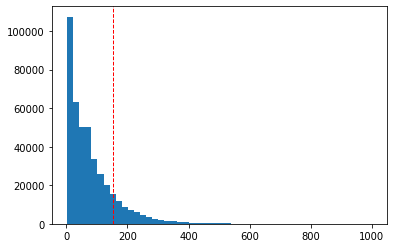

In [16]:
histogram = plt.hist(alldata.PM2dot5, bins = 50, 
                     range= (alldata.PM2dot5.min(), alldata.PM2dot5.max()))
hisogram = plt.axvline(151, color = 'r', linestyle = 'dashed', linewidth = 1 )
plt.plot